In [1]:
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
import numpy as np

import explore 
import prepare  
import acquire  
import model as m

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

# imports for modeling
from sklearn.model_selection import train_test_split


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# imports for modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

# imports for visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm # for colormap tools
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import seaborn as sns
from mergedeep import merge

plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')

In [2]:
from prepare import basic_clean, tokenize, stem, lemmatize, remove_stopwords, remove_urls, remove_unicode_text

In [3]:
from prepare import prepare_nlp_data

In [4]:
from scipy import stats

In [5]:
#Acquire the URLS for the Repositories to explore

headers = acquire.headers
endpoint = "https://api.github.com/search/repositories"
query = "customer in:name"
sort = "stars"
per_page = 100
order = "desc"
page = 1

##Make the request
response = requests.get(f"{endpoint}?q={query}&sort={sort}&per_page={per_page}&order={order}&page={page}", headers=headers)
payload = response.json()
#payload['items']

In [6]:
page = 2

##Make the request
response = requests.get(f"{endpoint}?q={query}&sort={sort}&per_page={per_page}&order={order}&page={page}", headers=headers)
payload2 = response.json()
merge(payload, payload2)
payload['items']

[{'id': 178226060,
  'node_id': 'MDEwOlJlcG9zaXRvcnkxNzgyMjYwNjA=',
  'name': 'E-commerce-Customer-service-robot',
  'full_name': 'gongdelu/E-commerce-Customer-service-robot',
  'private': False,
  'owner': {'login': 'gongdelu',
   'id': 37997947,
   'node_id': 'MDQ6VXNlcjM3OTk3OTQ3',
   'avatar_url': 'https://avatars.githubusercontent.com/u/37997947?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/gongdelu',
   'html_url': 'https://github.com/gongdelu',
   'followers_url': 'https://api.github.com/users/gongdelu/followers',
   'following_url': 'https://api.github.com/users/gongdelu/following{/other_user}',
   'gists_url': 'https://api.github.com/users/gongdelu/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/gongdelu/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/gongdelu/subscriptions',
   'organizations_url': 'https://api.github.com/users/gongdelu/orgs',
   'repos_url': 'https://api.github.com/users/gongdelu/repos',


In [7]:
page = 3

##Make the request
response = requests.get(f"{endpoint}?q={query}&sort={sort}&per_page={per_page}&order={order}&page={page}", headers=headers)
payload2 = response.json()
merge(payload, payload2)
payload['items']

[{'id': 118996371,
  'node_id': 'MDEwOlJlcG9zaXRvcnkxMTg5OTYzNzE=',
  'name': 'CustomerChurn',
  'full_name': 'smit5490/CustomerChurn',
  'private': False,
  'owner': {'login': 'smit5490',
   'id': 13723626,
   'node_id': 'MDQ6VXNlcjEzNzIzNjI2',
   'avatar_url': 'https://avatars.githubusercontent.com/u/13723626?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/smit5490',
   'html_url': 'https://github.com/smit5490',
   'followers_url': 'https://api.github.com/users/smit5490/followers',
   'following_url': 'https://api.github.com/users/smit5490/following{/other_user}',
   'gists_url': 'https://api.github.com/users/smit5490/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/smit5490/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/smit5490/subscriptions',
   'organizations_url': 'https://api.github.com/users/smit5490/orgs',
   'repos_url': 'https://api.github.com/users/smit5490/repos',
   'events_url': 'https://api.github.com

In [8]:
#Convert the reponse to a data frame
urls_df = pd.DataFrame(payload['items'])

In [9]:
#Check the shape of the dataframe
urls_df.shape

(100, 79)

In [10]:
urls_df

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,allow_forking,is_template,topics,visibility,forks,open_issues,watchers,default_branch,permissions,score
0,118996371,MDEwOlJlcG9zaXRvcnkxMTg5OTYzNzE=,CustomerChurn,smit5490/CustomerChurn,False,"{'login': 'smit5490', 'id': 13723626, 'node_id...",https://github.com/smit5490/CustomerChurn,None,False,https://api.github.com/repos/smit5490/Customer...,...,True,False,[],public,8,4,10,master,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
1,58745539,MDEwOlJlcG9zaXRvcnk1ODc0NTUzOQ==,vc-module-customer,VirtoCommerce/vc-module-customer,False,"{'login': 'VirtoCommerce', 'id': 5762443, 'nod...",https://github.com/VirtoCommerce/vc-module-cus...,Contacts management module,False,https://api.github.com/repos/VirtoCommerce/vc-...,...,True,False,[],public,21,14,10,dev,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
2,62332503,MDEwOlJlcG9zaXRvcnk2MjMzMjUwMw==,customer_portal,SonarSoftware/customer_portal,False,"{'login': 'SonarSoftware', 'id': 12124408, 'no...",https://github.com/SonarSoftware/customer_portal,A customer portal for Sonar.,False,https://api.github.com/repos/SonarSoftware/cus...,...,True,False,[],public,15,1,10,master,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
3,85580569,MDEwOlJlcG9zaXRvcnk4NTU4MDU2OQ==,customer-portal,oroinc/customer-portal,False,"{'login': 'oroinc', 'id': 4165718, 'node_id': ...",https://github.com/oroinc/customer-portal,OroCommerce package with customer portal and n...,False,https://api.github.com/repos/oroinc/customer-p...,...,True,False,[],public,15,5,10,master,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
4,47967191,MDEwOlJlcG9zaXRvcnk0Nzk2NzE5MQ==,customer-scripts,microsoft/customer-scripts,False,"{'login': 'microsoft', 'id': 6154722, 'node_id...",https://github.com/microsoft/customer-scripts,Repository of scripts provided frequently to o...,False,https://api.github.com/repos/microsoft/custome...,...,True,False,[],public,13,1,10,master,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,69983058,MDEwOlJlcG9zaXRvcnk2OTk4MzA1OA==,ruby-sms-customer-engagement,Nexmo/ruby-sms-customer-engagement,False,"{'login': 'Nexmo', 'id': 551057, 'node_id': 'M...",https://github.com/Nexmo/ruby-sms-customer-eng...,Two-way SMS for customer engagement with Ruby,False,https://api.github.com/repos/Nexmo/ruby-sms-cu...,...,True,False,[tutorial],public,3,0,7,main,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
96,181278845,MDEwOlJlcG9zaXRvcnkxODEyNzg4NDU=,Kaggle_santander-customer-transaction-prediction,Rajneesh-Tiwari/Kaggle_santander-customer-tran...,False,"{'login': 'Rajneesh-Tiwari', 'id': 16912628, '...",https://github.com/Rajneesh-Tiwari/Kaggle_sant...,Code for 118th position in Kaggle santander-cu...,False,https://api.github.com/repos/Rajneesh-Tiwari/K...,...,True,False,[],public,3,0,7,master,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
97,149399792,MDEwOlJlcG9zaXRvcnkxNDkzOTk3OTI=,Exploratory-Data-Analysis-Customer-Churn-Predi...,Shubha23/Exploratory-Data-Analysis-Customer-Ch...,False,"{'login': 'Shubha23', 'id': 17091320, 'node_id...",https://github.com/Shubha23/Exploratory-Data-A...,Application of K-means clustering. Prediction ...,False,https://api.github.com/repos/Shubha23/Explorat...,...,True,False,[],public,3,0,7,master,"{'admin': False, 'maintain': False, 'push': Fa...",1.0
98,113375100,MDEwOlJlcG9zaXRvcnkxMTMzNzUxMDA=,woocommerce-customer-source,devinsays/woocommerce-customer-source,False,"{'login': 'devinsays', 'id': 431879, 'node_id'...",https://github.com/devinsays/woocommerce-custo...,Learn where your WooCommerce customers are com...,False,https://api.github.com/repos/devinsays/woocomm...,...,True,False,[],public,2,0,7,master,"{'admin': False, 'maintain': False, 'push': Fa...",1.0


In [11]:
#Get a list of the full_name for the urls. Saved to acquire seperate file as repos and assigned to a variable
urls_df.full_name.to_list()

['smit5490/CustomerChurn',
 'VirtoCommerce/vc-module-customer',
 'SonarSoftware/customer_portal',
 'oroinc/customer-portal',
 'microsoft/customer-scripts',
 'correooke/example-customers-app',
 'darkdreamingdan/mlnd-customer-segments',
 'emilybache/CustomerSync-Refactoring-Kata',
 'bestkao/customer_segments',
 'devmentors/Pacco.Services.Customers',
 'toshi-k/kaggle-santander-customer-satisfaction',
 'cometchat-pro-tutorials/react-customer-support-live-widget',
 'celestinhermez/sparkify_customer_churn',
 'Ifihan/customer-management-app',
 'skioo/django-customer-billing',
 'anqi666/Customer-Data-Analysis',
 'ho-nl/magento1-Ho_Customer',
 'mutedblues/Customer-Success-Management',
 'aryashah2k/Datalogy-Customer-Segmentation-Data-Science-Internship',
 'Horizon733/customer-care-chatbot',
 'dserradji/reactive-customer-service',
 'Ashniu123/nestjs-customer-order-eventsourcing-cqrs',
 'M-R-K-Development/bc-customer-plugin',
 'melihbodr/Sentiment_analysis_to_customer_comments',
 'nd009/creating_c

In [12]:
#Use the scrape github function from the acquire module to acquire the dataframe containing the names of the
#repositories and the contents of the readme files
df = acquire.scrape_github_data()

#convert the data into a dataframe
df = pd.DataFrame(df)
df.head()

,repo,language,readme_contents
0,gongdelu/E-commerce-Customer-service-robot,Jupyter Notebook,# E-commerce-Customer-service-robot\n电商多轮对话客服机...
1,Azure/fta-customerfacingapps,C#,# FastTrack for Azure\n\nSee our [FastTrack fo...
2,ELMAHDI-AR/CustomerAuthentication-With-ASP.NET...,PowerShell,
3,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...
4,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...


In [13]:
# read in the json file generated by compiling the acquire.py file
df = pd.read_json('data2.json')

In [14]:
df.head()

,repo,language,readme_contents
0,gongdelu/E-commerce-Customer-service-robot,Jupyter Notebook,# E-commerce-Customer-service-robot\n电商多轮对话客服机...
1,Azure/fta-customerfacingapps,C#,# FastTrack for Azure\n\nSee our [FastTrack fo...
2,ELMAHDI-AR/CustomerAuthentication-With-ASP.NET...,PowerShell,
3,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...
4,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...


In [15]:
len(df)

200

In [16]:
df.head()

,repo,language,readme_contents
0,gongdelu/E-commerce-Customer-service-robot,Jupyter Notebook,# E-commerce-Customer-service-robot\n电商多轮对话客服机...
1,Azure/fta-customerfacingapps,C#,# FastTrack for Azure\n\nSee our [FastTrack fo...
2,ELMAHDI-AR/CustomerAuthentication-With-ASP.NET...,PowerShell,
3,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...
4,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...


In [17]:
# do drop unneeded data first then prep
df = prepare.drop_unneeded_data(df)

In [18]:
df.head()

,repo,language,readme_contents
0,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...
1,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...
2,optiflow/rfm-customer-segmentation,Jupyter Notebook,"# Recency, Frequency, and Monetary (RFM) Custo..."
3,Sylius/CustomerReorderPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...
4,Prakhar-FF13/Customer-Analytics,Jupyter Notebook,## Business Problem :\n\n#### Problem statemen...


In [19]:
df = prepare_nlp_data(df, content = 'readme_contents')

In [20]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
0,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...,customer analytics ipython notebook see httpkp...,custom analyt ipython notebook see httpkpeimeb...,customer analytics ipython notebook see httpkp...
1,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...
2,optiflow/rfm-customer-segmentation,Jupyter Notebook,"# Recency, Frequency, and Monetary (RFM) Custo...",recency frequency monetary rfm customer segmen...,recenc frequenc monetari rfm custom segment us...,recency frequency monetary rfm customer segmen...
3,Sylius/CustomerReorderPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...
4,Prakhar-FF13/Customer-Analytics,Jupyter Notebook,## Business Problem :\n\n#### Problem statemen...,business problem problem statement goal come s...,busi problem problem statement goal come solut...,business problem problem statement goal come s...


## Explore

### What are the most common words in READme files?

In [21]:
words = ' '.join(df.stemmed)

In [22]:
words[0:1500]

'custom analyt ipython notebook see httpkpeimeblogp921 warn bewar repositori deprec maintain evolv syliu team still use compat syliu version risk bug fix custom order cancel plugin plugin allow custom cancel place order process screenshot show custom order page cancel buttonsdocsscreenshotpng busi valu far custom chang mind alreadi place order administr cancel order howev ask question cant custom cancel order yet paid come custom order cancel plugin allow cancel unpaid order straight order histori view instal bewar instal instruct assum your use symfoni flex dont take look legaci instal instructiondocslegacyinstallationmd howev strongli encourag use symfoni flex much quicker instal plugin requir compos bash compos requir syliuscustomerordercancellationplugin rememb allow commun recip compos config extrasymfonyallowcontrib true plugin instal process extens point custom order cancel plugin use order entiti deriv syliuscorebundl well alreadi defin state default plugin implement assum orde

In [23]:
frequencies = pd.Series(words.split()).value_counts()

In [24]:
frequencies.head(50)

custom      905
data        405
use         398
model       247
creat       203
1           178
2           170
instal      166
&#9;        151
file        150
project     150
featur      144
new         144
run         139
account     132
notebook    129
magento     128
set         125
segment     115
valu        106
select      104
churn       103
follow      103
product     103
click       101
code        100
predict      98
servic       94
login        93
market       92
one          92
need         90
inform       89
email        89
page         88
compani      88
provid       87
approv       87
name         87
view         86
deploy       86
function     85
time         85
get          81
add          81
also         81
admin        79
learn        79
applic       79
api          78
dtype: int64

In [25]:
top_20_words = frequencies.head(20)

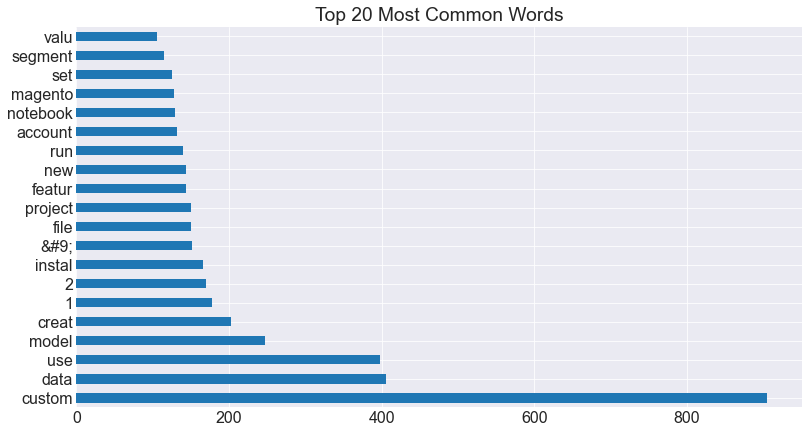

In [26]:
top_20_words.plot.barh()
title = plt.title('Top 20 Most Common Words')

In [27]:
from wordcloud import WordCloud

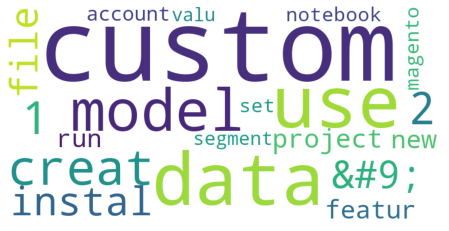

In [28]:
data = {k: v for k, v in top_20_words.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

### Does the length of the README vary by programming language?

In [29]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
0,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...,customer analytics ipython notebook see httpkp...,custom analyt ipython notebook see httpkpeimeb...,customer analytics ipython notebook see httpkp...
1,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...
2,optiflow/rfm-customer-segmentation,Jupyter Notebook,"# Recency, Frequency, and Monetary (RFM) Custo...",recency frequency monetary rfm customer segmen...,recenc frequenc monetari rfm custom segment us...,recency frequency monetary rfm customer segmen...
3,Sylius/CustomerReorderPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...
4,Prakhar-FF13/Customer-Analytics,Jupyter Notebook,## Business Problem :\n\n#### Problem statemen...,business problem problem statement goal come s...,busi problem problem statement goal come solut...,business problem problem statement goal come s...


In [30]:
length_readme = []
for i in range(len(df)):
    length_readme.append(len(df.readme_contents[i]))

In [31]:
length_readme_df = pd.DataFrame(length_readme)

In [32]:
df = pd.concat([df, length_readme_df], axis = 1)

In [33]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,0
0,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...,customer analytics ipython notebook see httpkp...,custom analyt ipython notebook see httpkpeimeb...,customer analytics ipython notebook see httpkp...,69
1,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,2039
2,optiflow/rfm-customer-segmentation,Jupyter Notebook,"# Recency, Frequency, and Monetary (RFM) Custo...",recency frequency monetary rfm customer segmen...,recenc frequenc monetari rfm custom segment us...,recency frequency monetary rfm customer segmen...,515
3,Sylius/CustomerReorderPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,2975
4,Prakhar-FF13/Customer-Analytics,Jupyter Notebook,## Business Problem :\n\n#### Problem statemen...,business problem problem statement goal come s...,busi problem problem statement goal come solut...,business problem problem statement goal come s...,4947


In [34]:
df.rename(columns = {0: "length"}, inplace = True)

In [35]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,length
0,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...,customer analytics ipython notebook see httpkp...,custom analyt ipython notebook see httpkpeimeb...,customer analytics ipython notebook see httpkp...,69
1,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,2039
2,optiflow/rfm-customer-segmentation,Jupyter Notebook,"# Recency, Frequency, and Monetary (RFM) Custo...",recency frequency monetary rfm customer segmen...,recenc frequenc monetari rfm custom segment us...,recency frequency monetary rfm customer segmen...,515
3,Sylius/CustomerReorderPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,2975
4,Prakhar-FF13/Customer-Analytics,Jupyter Notebook,## Business Problem :\n\n#### Problem statemen...,business problem problem statement goal come s...,busi problem problem statement goal come solut...,business problem problem statement goal come s...,4947


In [36]:
df.language.value_counts()

Jupyter Notebook    45
PHP                 37
Python              20
JavaScript          20
Name: language, dtype: int64

In [37]:
jupyter = df[df.language == "Jupyter Notebook"]
php = df[df.language == "PHP"]
python = df[df.language == "Python"]
java = df[df.language == "JavaScript"]

In [38]:
php.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,length
1,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,2039
3,Sylius/CustomerReorderPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,2975
6,php-cuong/magento2-customer-avatar,PHP,# Magento 2 Customer Avatar\nThis is an awesom...,magento 2 customer avatar awesome module allow...,magento 2 custom avatar awesom modul allow cus...,magento 2 customer avatar awesome module allow...,2399
7,printu/customerio,PHP,# Customer.io API Client\n\nPHP bindings for t...,customerio api client php bindings customerio ...,customerio api client php bind customerio api ...,customerio api client php binding customerio a...,5323
8,kiwicommerce/magento2-login-as-customer,PHP,"# We're not maintaining this extension, if you...",maintaining extension need support please cont...,maintain extens need support pleas contact us ...,maintaining extension need support please cont...,3636


In [39]:
jupyter = jupyter.reset_index()
php = php.reset_index()
python = python.reset_index()
java = java.reset_index()

In [40]:
dataframes = [jupyter, php, python, java]
for lang in dataframes:
    print(lang.language[0])
    print("Median READme length", lang.length.median())
    print("Mean READme length", lang.length.mean())
    print(" ")

Jupyter Notebook
Median READme length 2182.0
Mean READme length 4199.711111111111
 
PHP
Median READme length 925.0
Mean READme length 2037.7567567567567
 
Python
Median READme length 896.0
Mean READme length 2055.35
 
JavaScript
Median READme length 2260.5
Mean READme length 3539.65
 


In [41]:
not_jupyter = [php, python, java]
for lang in not_jupyter:
    print(lang.language[0], "average READme length vs Jupyter average length")
    print(stats.ttest_ind(lang.length, jupyter.length))
    print(" ")

PHP average READme length vs Jupyter average length
Ttest_indResult(statistic=-1.74939469606856, pvalue=0.08405781340041898)
 
Python average READme length vs Jupyter average length
Ttest_indResult(statistic=-1.2990957707424486, pvalue=0.19864545773694278)
 
JavaScript average READme length vs Jupyter average length
Ttest_indResult(statistic=-0.38865948799604033, pvalue=0.6988384831374672)
 


In [42]:
not_php = [python, java]
for lang in not_php:
    print(lang.language[0], "average READme length vs PHP average length")
    print(stats.ttest_ind(lang.length, php.length))
    print(" ")

Python average READme length vs PHP average length
Ttest_indResult(statistic=0.020717404723745884, pvalue=0.9835460632521257)
 
JavaScript average READme length vs PHP average length
Ttest_indResult(statistic=1.569185042908125, pvalue=0.12234069126376257)
 


In [43]:
print("Python average READme length vs Java average length")
print(stats.ttest_ind(python.length, java.length))

Python average READme length vs Java average length
Ttest_indResult(statistic=-1.2338038776754614, pvalue=0.22485286192052079)


None of the average READme lengths are significantly different from one another.

In [44]:
for lang in dataframes:
    print(lang.language[0], "READme length vs all languages READme lengths")
    print(stats.ttest_1samp(lang.length, df.length.mean()))
    print(" ")

Jupyter Notebook READme length vs all languages READme lengths
Ttest_1sampResult(statistic=1.0651324350771445, pvalue=0.2926262671104404)
 
PHP READme length vs all languages READme lengths
Ttest_1sampResult(statistic=-2.170972625267649, pvalue=0.03660529430486351)
 
Python READme length vs all languages READme lengths
Ttest_1sampResult(statistic=-1.3995728631551985, pvalue=0.17775681621454606)
 
JavaScript READme length vs all languages READme lengths
Ttest_1sampResult(statistic=0.47818893747168717, pvalue=0.6379716853931383)
 


None of the language READme lengths differ significantly from the population READme lengths.

### Do different programming languages use a different number of unique words?

In [45]:
jupyter_words = ' '.join(jupyter.stemmed)

In [46]:
jupyter_unique_words = len(set(re.findall('\w+', jupyter_words)))

In [47]:
jupyter_unique_words

3020

In [48]:
php_words = ' '.join(php.stemmed)

In [49]:
php_unique_words = len(set(re.findall('\w+', php_words)))

In [50]:
php_unique_words

1365

In [51]:
python_words = ' '.join(python.stemmed)

In [52]:
python_unique_words = len(set(re.findall('\w+', python_words)))

In [53]:
python_unique_words

1245

In [54]:
java_words = ' '.join(java.stemmed)

In [55]:
java_unique_words = len(set(re.findall('\w+', java_words)))

In [56]:
java_unique_words

1517

In [57]:
all_words_unique = []
for i in range(len(df)):
    all_words_unique.append(len(set(re.findall('\w+', df.stemmed[i]))))

In [58]:
words_unique_df = pd.DataFrame(all_words_unique)

In [59]:
df = pd.concat([df, words_unique_df], axis = 1)

In [60]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,length,0
0,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...,customer analytics ipython notebook see httpkp...,custom analyt ipython notebook see httpkpeimeb...,customer analytics ipython notebook see httpkp...,69,6
1,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,2039,103
2,optiflow/rfm-customer-segmentation,Jupyter Notebook,"# Recency, Frequency, and Monetary (RFM) Custo...",recency frequency monetary rfm customer segmen...,recenc frequenc monetari rfm custom segment us...,recency frequency monetary rfm customer segmen...,515,26
3,Sylius/CustomerReorderPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,2975,141
4,Prakhar-FF13/Customer-Analytics,Jupyter Notebook,## Business Problem :\n\n#### Problem statemen...,business problem problem statement goal come s...,busi problem problem statement goal come solut...,business problem problem statement goal come s...,4947,181


In [61]:
df.rename(columns = {0: "unique_words"}, inplace = True)

In [62]:
jupyter = df[df.language == "Jupyter Notebook"]
php = df[df.language == "PHP"]
python = df[df.language == "Python"]
java = df[df.language == "JavaScript"]

In [63]:
jupyter = jupyter.reset_index()
php = php.reset_index()
python = python.reset_index()
java = java.reset_index()

In [64]:
not_jupyter = [php, python, java]
for lang in not_jupyter:
    print(lang.language[0], "average unique words vs Jupyter average unique words")
    print(stats.ttest_ind(lang.unique_words, jupyter.unique_words))
    print(" ")

PHP average unique words vs Jupyter average unique words
Ttest_indResult(statistic=-2.513177192126888, pvalue=0.013973498390648835)
 
Python average unique words vs Jupyter average unique words
Ttest_indResult(statistic=-1.5026469037417913, pvalue=0.13792644105592747)
 
JavaScript average unique words vs Jupyter average unique words
Ttest_indResult(statistic=-0.5960058897813489, pvalue=0.5533066964740205)
 


In [65]:
not_php = [python, java]
for lang in not_php:
    print(lang.language[0], "average unique words vs PHP average unique words")
    print(stats.ttest_ind(lang.unique_words, php.unique_words))
    print(" ")

Python average unique words vs PHP average unique words
Ttest_indResult(statistic=0.48599978736625626, pvalue=0.6288980631680479)
 
JavaScript average unique words vs PHP average unique words
Ttest_indResult(statistic=2.107228114797819, pvalue=0.03967170651698252)
 


In [66]:
print("Python average unique words vs Java average unique words")
print(stats.ttest_ind(python.unique_words, java.unique_words))

Python average unique words vs Java average unique words
Ttest_indResult(statistic=-1.0523231034666818, pvalue=0.2992972607465392)


- Javascript unique words differs significantly from PHP.
- Jupyter Notebook differs significantly from PHP.

In [67]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,length,unique_words
0,kpei/Customer-Analytics,Jupyter Notebook,# Customer Analytics iPython Notebook\nSee htt...,customer analytics ipython notebook see httpkp...,custom analyt ipython notebook see httpkpeimeb...,customer analytics ipython notebook see httpkp...,69,6
1,Sylius/CustomerOrderCancellationPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,2039,103
2,optiflow/rfm-customer-segmentation,Jupyter Notebook,"# Recency, Frequency, and Monetary (RFM) Custo...",recency frequency monetary rfm customer segmen...,recenc frequenc monetari rfm custom segment us...,recency frequency monetary rfm customer segmen...,515,26
3,Sylius/CustomerReorderPlugin,PHP,> :warning: **BEWARE!**\n> This repository has...,warning beware repository deprecated maintaine...,warn bewar repositori deprec maintain evolv sy...,warning beware repository deprecated maintaine...,2975,141
4,Prakhar-FF13/Customer-Analytics,Jupyter Notebook,## Business Problem :\n\n#### Problem statemen...,business problem problem statement goal come s...,busi problem problem statement goal come solut...,business problem problem statement goal come s...,4947,181


In [68]:
dataframes = [jupyter, php, python, java]

In [69]:
for lang in dataframes:
    print(lang.language[0], "unique words vs all languages unique words")
    print(stats.ttest_1samp(lang.unique_words, df.unique_words.mean()))
    print(" ")

Jupyter Notebook unique words vs all languages unique words
Ttest_1sampResult(statistic=1.458116386150115, pvalue=0.15190991958619815)
 
PHP unique words vs all languages unique words
Ttest_1sampResult(statistic=-3.4867076684901046, pvalue=0.0013065277798148792)
 
Python unique words vs all languages unique words
Ttest_1sampResult(statistic=-1.001534261393148, pvalue=0.3291539804754783)
 
JavaScript unique words vs all languages unique words
Ttest_1sampResult(statistic=0.4805273179244431, pvalue=0.6363388767639531)
 


Only PHP has significantly different unique word from the population.

In [70]:
train, validate, test = prepare.split_data(df)

train---> (67, 8)
validate---> (30, 8)
test---> (25, 8)


In [71]:
all_word_counts = explore.get_word_counts_series(train, 'lemmatized')
java_word_counts = explore.get_word_counts_series(train[train.language == 'Java'], 'lemmatized')
javascript_word_counts = explore.get_word_counts_series(train[train.language == 'JavaScript'], 'lemmatized')
php_word_counts = explore.get_word_counts_series(train[train.language == 'PHP'], 'lemmatized')
jupyter_word_counts = explore.get_word_counts_series(train[train.language == 'Jupyter Notebook'], 'lemmatized')

In [72]:
all_word_counts[all_word_counts.index == 'customer']

customer    443
dtype: int64

In [73]:
word_counts_list = [java_word_counts, javascript_word_counts, php_word_counts, jupyter_word_counts, all_word_counts]
column_names = list(df.language.unique())
column_names.append('all')

languages = list(df.language.unique())

In [74]:
word_counts = pd.concat(word_counts_list, axis=1).fillna(0).astype(int)
word_counts.columns = column_names
word_counts.head()

,Jupyter Notebook,PHP,JavaScript,Python,all
&#9;,0,0,10,1,96
0,0,0,0,4,7
001,0,0,1,0,2
002,0,0,1,0,1
003,0,0,1,0,1


In [75]:
def plot_overlap_stacked_bar(word_counts, category, num_top = 20, cmap = None):
    '''
    This function takes in word_counts df
        - Must have counts for each category as well as a category named 'all'
    category you want to sort by (aka top 20 words in java readmes)
    num_top is how many words you want to see the proportion of, default = 20
    Default colors are tab10 but you can customize that
    
    for cmap use 'viridis'
    
    '''
    plt.figure(figsize=(16, 9))
    plt.rc('font', size=16)
    # axis=1 in .apply means row by row
    (word_counts.sort_values(by='all', ascending=False)
     .head(num_top)
     .apply(lambda row: row / row['all'], axis=1)
     .drop(columns='all')
     .sort_values(by=category)
     .plot.barh(stacked=True, width=1, ec='lightgrey', cmap = cmap, alpha = 1))
    plt.legend(bbox_to_anchor= (1.03,1))
    plt.title(f'% of most common {num_top} {category} Readme Words\n')
    plt.xlabel('\nProportion of Overlap')
    # make tick lables display as percentages!! 
    plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
    
    plt.show()

<Figure size 1152x648 with 0 Axes>

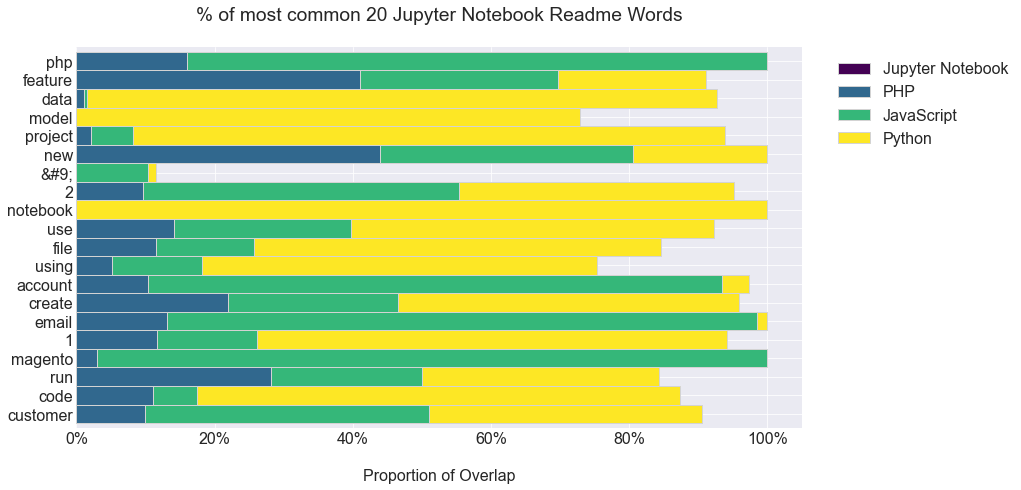

<Figure size 1152x648 with 0 Axes>

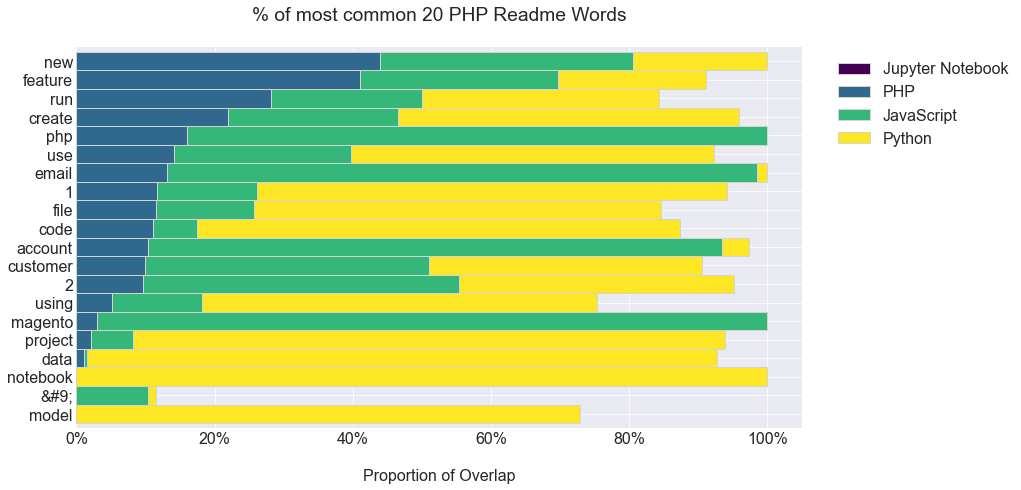

<Figure size 1152x648 with 0 Axes>

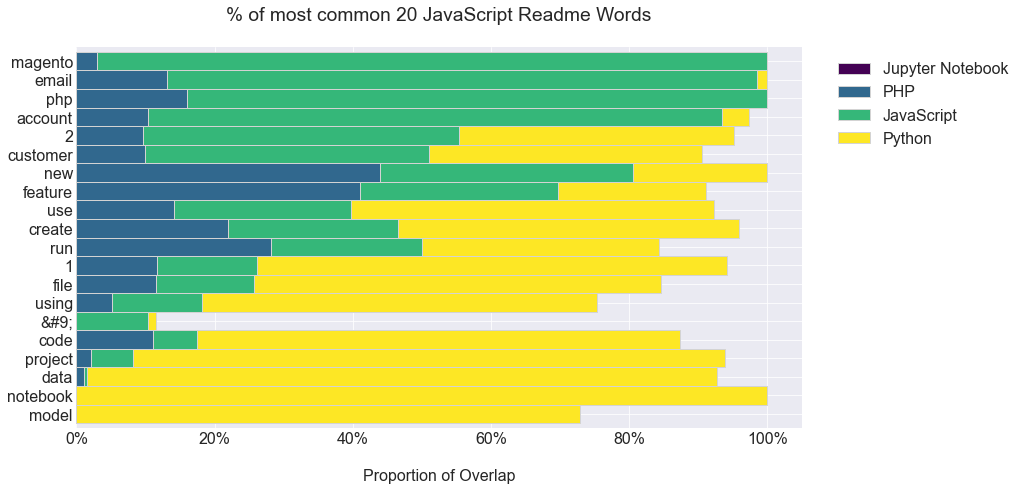

<Figure size 1152x648 with 0 Axes>

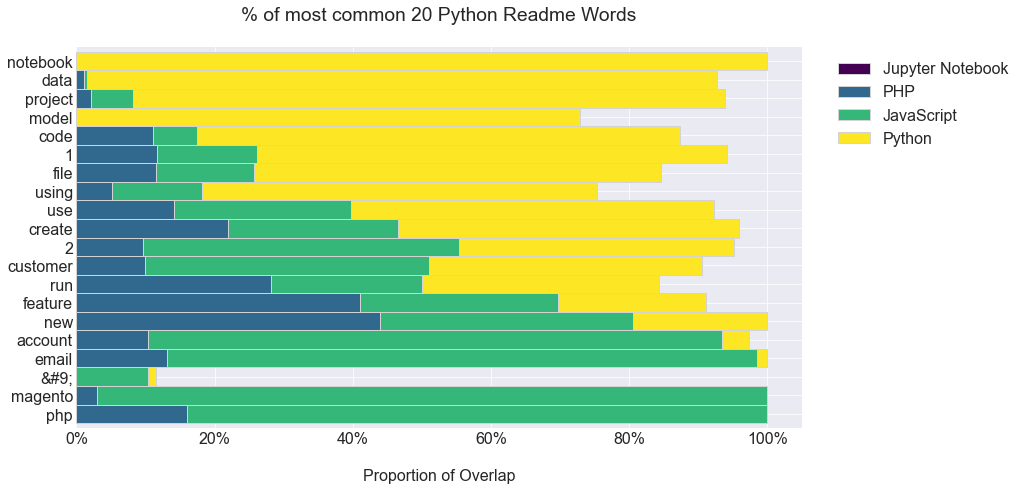

In [76]:
for language in languages:
    plot_overlap_stacked_bar(word_counts, language, cmap = 'viridis')

Take aways

- magento and model were among the top 20 in each language

In [77]:
df.language.value_counts()

Jupyter Notebook    45
PHP                 37
Python              20
JavaScript          20
Name: language, dtype: int64

Modeling

In [78]:
#PHP is the baseline prediction
print(f'Baseline Accuracy: {round(max(train.language.value_counts()) / train.shape[0] *100)}%')

Baseline Accuracy: 37%


## Lemmatized 

In [79]:
# create dataframe to store the scores
score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])

In [80]:
#TD/IDF vectorizer on the lemmatized data.

In [81]:
tfidf = TfidfVectorizer()
X_data = tfidf.fit_transform(df.lemmatized)
y_data = df.language

# split to X/y datasets 
X_train, y_train, X_validate, y_validate, X_test, y_test = m.nlp_X_train_split(X_data, y_data)

In [82]:
# create list of models to loop through
model_list = [MultinomialNB(), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), LogisticRegression()]

# create list of model names that correspond to models
model_names = ['Naive_Bayes_tfidf_lemmatized', 'SVC_tfidf_lemmatized', 'Decision_tree_tfidf_lemmatized', 
               'Random_forest_tfidf_lemmatized', 'KNN_tfidf_lemmatized', 'Log_reg_tfidf_lemmatized']

# initialize list of names of the languages
class_names = ['Java', 'JavaScript', 'Python','PHP' ]

In [83]:
for model, name in zip(model_list, model_names):
    score_df = m.test_a_model(X_train, y_train, X_validate, y_validate, model, name, score_df)

In [84]:
#stemmed data still using the TD/IDF vectorizer.

In [85]:
# bring in the vectorizer
tfidf = TfidfVectorizer()

X_data = tfidf.fit_transform(df.stemmed)
y_data = df.language

# split to X/y datasets 
X_train, y_train, X_validate, y_validate, X_test, y_test = m.nlp_X_train_split(X_data, y_data)

In [86]:
# make a list of algorithms we want to try for our models
model_list = [MultinomialNB(), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), LogisticRegression()]

# name the models
model_names = ['Naive_Bayes_stemmed', 'SVC_stemmed', 'Decision_tree_stemmed', 'Random_forest_stemmed', 'KNN_bigrams_stemmed', 'Log_reg_stemmed']

# list the languages
class_names = ['Java', 'JavaScript', 'Python','PHP' ]

In [87]:
for model, name in zip(model_list, model_names):
    score_df = m.test_a_model(X_train, y_train, X_validate, y_validate, model, name, score_df)

In [88]:
score_df

,model_name,train_score,validate_score
0,Naive_Bayes_tfidf_lemmatized,0.731343,0.600000
1,SVC_tfidf_lemmatized,0.970149,0.666667
2,Decision_tree_tfidf_lemmatized,0.970149,0.500000
3,Random_forest_tfidf_lemmatized,0.970149,0.733333
4,KNN_tfidf_lemmatized,0.850746,0.633333
5,Log_reg_tfidf_lemmatized,0.910448,0.633333
6,Naive_Bayes_stemmed,0.701493,0.633333
7,SVC_stemmed,0.970149,0.633333
8,Decision_tree_stemmed,0.970149,0.633333
9,Random_forest_stemmed,0.970149,0.666667


Takeaways

- Overall most of the models performed well
- It looks like most of the models utilizing the stemmed data are overfit
- Using the stemmed data does not give us better accuracy than the lemmatized data

Let's see how our models do with bigrams using lemmatized data.

In [89]:
tfidf = TfidfVectorizer(ngram_range=(2,2))
X_data = tfidf.fit_transform(df.lemmatized)
y_data = df.language

X_train, y_train, X_validate, y_validate, X_test, y_test = m.nlp_X_train_split(X_data, y_data)

In [90]:
model_list = [MultinomialNB(), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

model_names = ['Naive_Bayes_tfidf2', 'SVC_tfidf2', 'Decision_tree_tfidf2', 'Random_forest_tfidf2', 'KNN_bigrams_tfidf2']

class_names = ['Java', 'JavaScript', 'Python','PHP' ]

In [91]:
for model, name in zip(model_list, model_names):
    score_df = m.test_a_model(X_train, y_train, X_validate, y_validate, model, name, score_df)

In [92]:
#using just the clean data (not lemmatized or stemmed)

In [93]:
tfidf = TfidfVectorizer()
X_data = tfidf.fit_transform(df.clean)
y_data = df.language

X_train, y_train, X_validate, y_validate, X_test, y_test = m.nlp_X_train_split(X_data, y_data)

In [94]:
model_list = [MultinomialNB(), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(n_neighbors=10, weights= 'distance'),
             LogisticRegression()]

model_names = ['Naive_Bayes_tfidf_clean', 'SVC_tfidf_clean', 'Decision_tree_tfidf_clean', 'Random_forest_tfidf_clean', 'KNN_n10_tfidf_clean',
              'Log_reg_clean']

class_names = ['Java', 'JavaScript', 'Python','PHP' ]

In [95]:
for model, name in zip(model_list, model_names):
    score_df = m.test_a_model(X_train, y_train, X_validate, y_validate, model, name, score_df)

In [96]:
score_df.sort_values(by = 'validate_score', ascending = False)

,model_name,train_score,validate_score
21,KNN_n10_tfidf_clean,0.970149,0.766667
3,Random_forest_tfidf_lemmatized,0.970149,0.733333
20,Random_forest_tfidf_clean,0.970149,0.733333
18,SVC_tfidf_clean,0.970149,0.700000
9,Random_forest_stemmed,0.970149,0.666667
1,SVC_tfidf_lemmatized,0.970149,0.666667
10,KNN_bigrams_stemmed,0.850746,0.666667
11,Log_reg_stemmed,0.910448,0.633333
22,Log_reg_clean,0.910448,0.633333
8,Decision_tree_stemmed,0.970149,0.633333


The top score is the KNN_n10_tfidf_clean utilizing the TD/IDf method. Let's take a deeper look at the results from that model with the Train and Validate datasets.

                   ============== KNN ================           
KNeighborsClassifier(n_neighbors=10, weights='distance')
~~~~~~~~Train Scores~~~~~~~~~
                  precision    recall  f1-score   support

      JavaScript       0.85      1.00      0.92        11
Jupyter Notebook       1.00      1.00      1.00        25
             PHP       1.00      0.95      0.97        20
          Python       1.00      0.91      0.95        11

        accuracy                           0.97        67
       macro avg       0.96      0.96      0.96        67
    weighted avg       0.97      0.97      0.97        67



/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


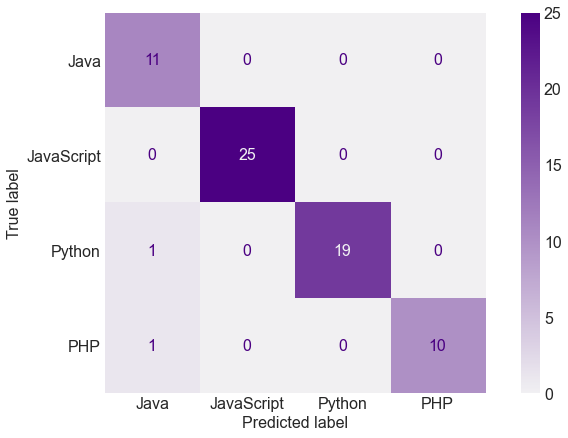


KNeighborsClassifier(n_neighbors=10, weights='distance')
~~~~~~~~Validate Scores~~~~~~~~~
                  precision    recall  f1-score   support

      JavaScript       0.75      0.60      0.67         5
Jupyter Notebook       0.79      1.00      0.88        11
             PHP       0.73      0.89      0.80         9
          Python       1.00      0.20      0.33         5

        accuracy                           0.77        30
       macro avg       0.82      0.67      0.67        30
    weighted avg       0.80      0.77      0.73        30



/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


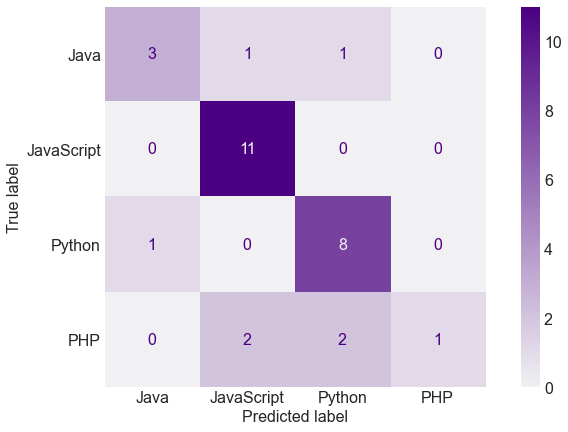


-------------------------------------------------------------------



In [97]:
tfidf = TfidfVectorizer()
X_data = tfidf.fit_transform(df.clean)
y_data = df.language

X_train, y_train, X_validate, y_validate, X_test, y_test = m.nlp_X_train_split(X_data, y_data)

m.make_models_and_print_metrics(KNeighborsClassifier(n_neighbors=10, weights= 'distance'), 'KNN', X_train, y_train, X_validate, y_validate, class_names)

### Takeaways

While the model is overfit on the training data, it seems to still do well on the Validate set (77% accuracy). It might be due to the amount of readmes we are pulling from. We can take this model now to our test data to see how it performs.



In [98]:
tfidf = TfidfVectorizer()
X_data = tfidf.fit_transform(df.clean)
y_data = df.language

X_train, y_train, X_validate, y_validate, X_test, y_test = m.nlp_X_train_split(X_data, y_data)

                   ============== KNN_n10_tfidf_clean ================           
KNeighborsClassifier(n_neighbors=10, weights='distance')
~~~~~~~~Test Scores~~~~~~~~~
                  precision    recall  f1-score   support

      JavaScript       0.25      0.25      0.25         4
Jupyter Notebook       0.75      1.00      0.86         9
             PHP       0.67      0.75      0.71         8
          Python       0.00      0.00      0.00         4

        accuracy                           0.64        25
       macro avg       0.42      0.50      0.45        25
    weighted avg       0.52      0.64      0.57        25



/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/si

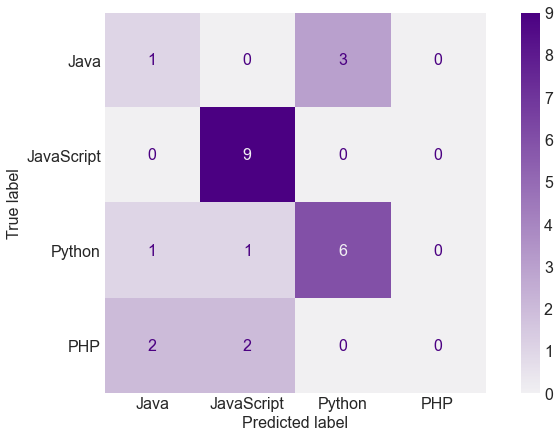


-------------------------------------------------------------------



In [99]:
# The second confusion matrix should be test

m.make_models_and_print_metrics_test_data(KNeighborsClassifier(n_neighbors=10, weights= 'distance'), 'KNN_n10_tfidf_clean', X_train, y_train, X_test, y_test, class_names)

In [100]:
# set palette
sns.set_palette('viridis_r')

# set up second dataframe for scores top 7 
score_df2 = score_df.set_index('model_name').sort_values(by = ['validate_score', 'model_name'], ascending = False).head(7)

# add the test score to the model we tested on (KNN)
score_df2['test_score']= [0.64, 0, 0, 0, 0, 0, 0]

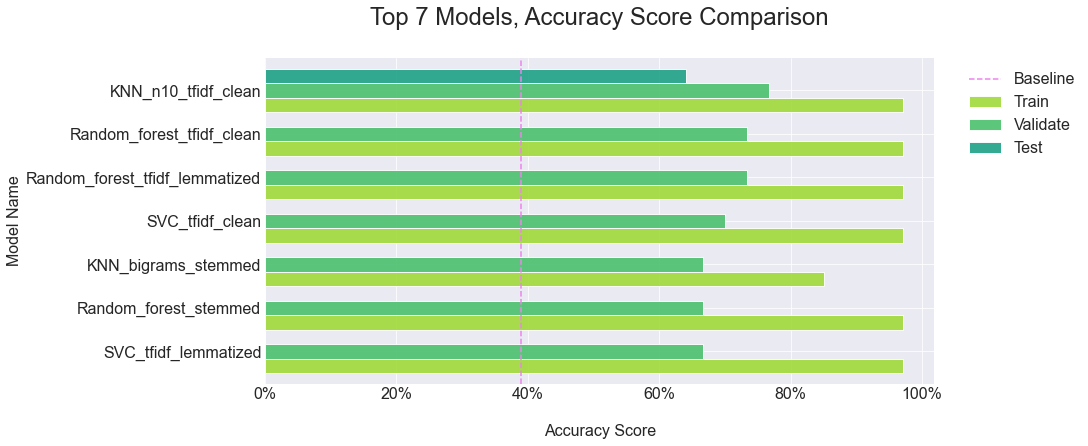

In [101]:
score_df2.sort_values(by= ['test_score', 'validate_score']).plot.barh(alpha = .9, width = 1, ec = 'white', 
                                                                      figsize = (12,6))
# plot baseline
plt.axvline(x = .39, c = 'violet', linestyle = '--')
plt.legend(['Baseline','Train', 'Validate','Test'], bbox_to_anchor = (1.03,1))
plt.ylabel('Model Name')
plt.xlabel('\nAccuracy Score')
# set ticks to percentages
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
plt.title('Top 7 Models, Accuracy Score Comparison\n', fontsize = 24)
plt.show()